# Let us build a routing engine

---
The following topics will be covered in this chapter:
* Fundamentals of Graph data structure.
* Various functionalities provided by networkx to solve graph problems
* Creating a graph from an OSM Road network
* Performing Shortest Path and Shortest Time analyses on the road network
* Isochrones and its utility





# Nuts and Bolts of Graph

In [24]:
!pip install networkx

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
import networkx as nx
import matplotlib.pyplot as plt 

### Simple Graph

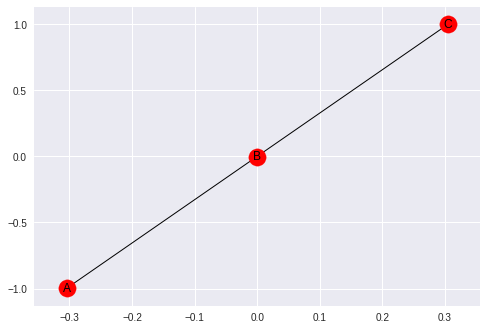

In [2]:
G = nx.Graph()
G.add_edge('A','B')
G.add_edge('B','C')

nx.draw_networkx(G)

### Directional Graph



![New York One Way/ Martin](https://c2.staticflickr.com/6/5123/5342642988_6fb00d2b01_n.jpg)

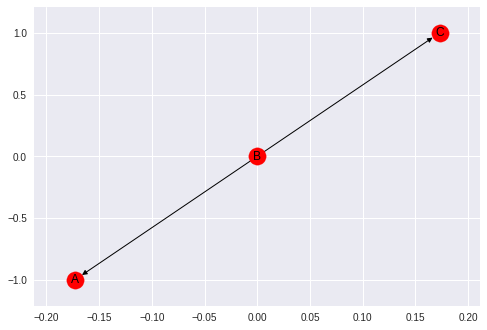

In [7]:
H = nx.DiGraph()
H.add_edge('B', 'A')
H.add_edge('B','C')


nx.draw_networkx(H)

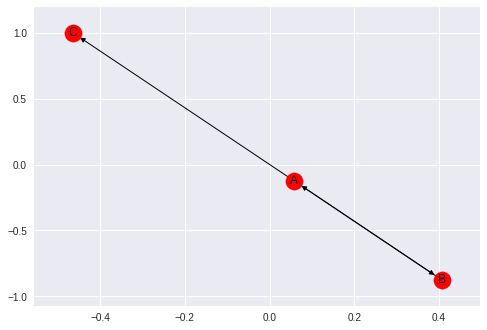

In [8]:
I = nx.DiGraph()
I.add_edge("A", "B")
I.add_edge("B", "A")
I.add_edge("A", "C")


nx.draw_networkx(I)

### Weighted Graph

In [0]:
G=nx.DiGraph()

G.add_edge('A','B',weight=6)
G.add_edge('A','C',weight=2)
G.add_edge('C','D',weight=4.5)
G.add_edge('C','E',weight=5)
G.add_edge('C','F',weight=6)
G.add_edge('A','D',weight=3)

{('A', 'B'): Text(0.57581,0.0594437,'6'),
 ('A', 'C'): Text(-0.0152574,-0.0238449,'2'),
 ('A', 'D'): Text(-0.23584,-0.288466,'3'),
 ('C', 'D'): Text(-0.472538,-0.239063,'4.5'),
 ('C', 'E'): Text(-0.316904,0.512779,'5'),
 ('C', 'F'): Text(-0.0383232,-0.307602,'6')}

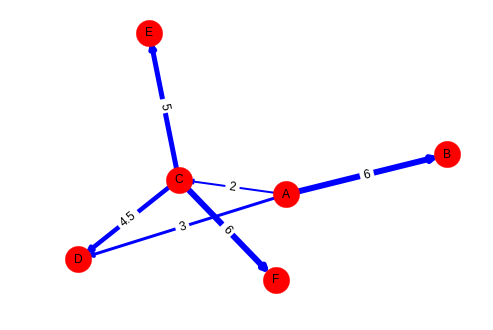

In [4]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=700)
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw(G, pos, edges=edges, edge_color='b', width=weights)
nx.draw_networkx_labels(G,pos,font_size=12)
nx.draw_networkx_edge_labels(G, pos, font_size=12, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}) 

# Shortest Path Algorithms

![alt text](https://)

In [6]:
L = nx.Graph()
L.add_edge("JK", "Ashish")
L.add_edge("JK", "Athulya")
L.add_edge("JK", "Peter")
L.add_edge("JK", "Eric")
L.add_edge("Peter", "Derrick")
L.add_edge("Peter", "Vijay")
L.add_edge("Eric", "Enoch")
L.add_edge("Athulya", "Jeremiah")
L.add_edge("Enoch", "Jeremiah")
L.add_edge("Derrick", "Obama" )
L.add_edge("Jeremiah", "Aaron")
L.add_edge("Aaron", "Obama")

nx.shortest_path_length(L,'JK')

{'Aaron': 3,
 'Ashish': 1,
 'Athulya': 1,
 'Derrick': 2,
 'Enoch': 2,
 'Eric': 1,
 'JK': 0,
 'Jeremiah': 2,
 'Obama': 3,
 'Peter': 1,
 'Vijay': 2}

(-1.1206480744587444,
 1.1068049291520548,
 -0.9702213321893759,
 0.8329453334878613)

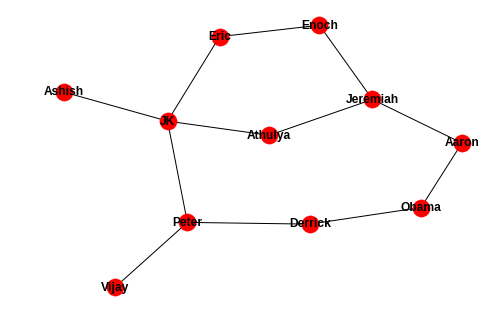

In [7]:
pos=nx.spring_layout(L, )
nx.draw_networkx(L, pos, font_weight="bold")
plt.axis('off')

## Dijkstra's Shortest Path Algorithm

In [0]:
R = nx.Graph()
eList = [(1, 2, 7.0), (1, 4, 5.0),
  (2, 3, 8.0), (2, 4, 9.0), (2, 5, 7.0),
  (3, 5, 5.0), (4, 5, 15.0), (4, 6, 6.0),
  (5, 6, 8.0), (5, 7, 9.0), (6, 7, 11.0)]

In [0]:
R.add_weighted_edges_from(eList)

(-0.8675670354681118,
 1.1092557938071281,
 -0.9407166654398647,
 0.8802732443260337)

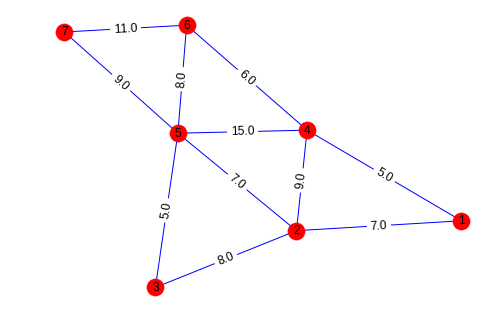

In [10]:
pos=nx.spring_layout(R)
nx.draw_networkx(R, pos, edges=edges, edge_color='b')
edge_labels = nx.get_edge_attributes(R,'weight')
nx.draw_networkx_edge_labels(R, pos, font_size=12, edge_labels=edge_labels) 
plt.axis('off')

### Dijkstra Path

In [11]:
nx.dijkstra_path(R, 1, 7)

[1, 4, 6, 7]

### Dijkstra Path Length (Cost)

In [0]:
?nx.dijkstra_path_length()

In [13]:
nx.dijkstra_path_length(R, 1, 7)

22.0

### Single Source Dijkstra Path Length

In [15]:
?nx.single_source_dijkstra_path_length()

{1: 14.0, 2: 7.0, 3: 5.0, 4: 14.0, 5: 0, 6: 8.0, 7: 9.0}

In [14]:
nx.single_source_dijkstra_path_length(R, 5)

{1: 14.0, 2: 7.0, 3: 5.0, 4: 14.0, 5: 0, 6: 8.0, 7: 9.0}

In [15]:
R.edges(1, data=True)

EdgeDataView([(1, 2, {'weight': 7.0}), (1, 4, {'weight': 5.0})])

In [0]:
N = nx.Graph()
eList = [(5, 3, 5.0),(5, 2, 7.0),(5,  6, 8.0),(5,  7, 9.0),(5,  1, 14.0), (5, 4, 14.0)]
N.add_weighted_edges_from(eList)

### Single Source Dijkstra Path Length w/ Cutoff

(-0.9245841126302006,
 0.7373765386333238,
 -1.083850362942966,
 1.1295763007471855)

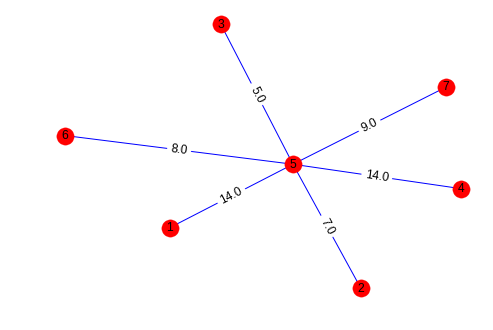

In [17]:
pos=nx.spring_layout(N)
nx.draw_networkx(N, pos, edge_color='b', )
edge_labels = nx.get_edge_attributes(N,'weight')
nx.draw_networkx_edge_labels(N, pos, font_size=12, edge_labels=edge_labels) 
plt.axis('off')

In [20]:
nx.single_source_dijkstra_path_length(R, 5, cutoff=10)

{2: 7.0, 3: 5.0, 5: 0, 6: 8.0, 7: 9.0}

## Dataframe --> Grpah

In [0]:
import pandas as pd
edges = pd.DataFrame({'source': [0, 1, 2],
                       'target': [2, 2, 3],
                       'dist': [3, 4, 5],
                      'time' :[10, 12, 15]
                     })


In [22]:
edges

,dist,source,target,time
0,3,0,2,10
1,4,1,2,12
2,5,2,3,15


In [0]:
G = nx.from_pandas_edgelist(edges, edge_attr=True, create_using= nx.DiGraph())

(-1.0257774771198247,
 1.1647881778375107,
 -1.1848446831124027,
 0.9452702365638564)

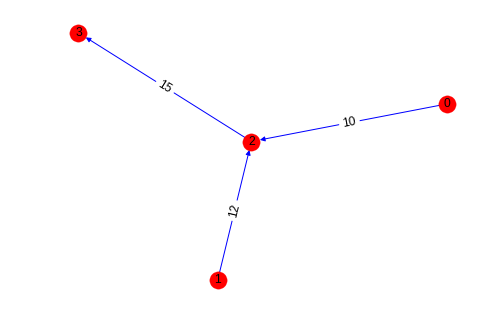

In [24]:
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos, edge_color='b', )
edge_labels = nx.get_edge_attributes(G,'time')
nx.draw_networkx_edge_labels(G, pos, font_size=12, edge_labels=edge_labels) 
plt.axis('off')

# Working w/ Real world Road Network 

In [2]:
!pip install geopandas

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import pandas as pd

In [4]:
roads_df = gpd.read_file('POIS/Roads_BayArea4.shp')

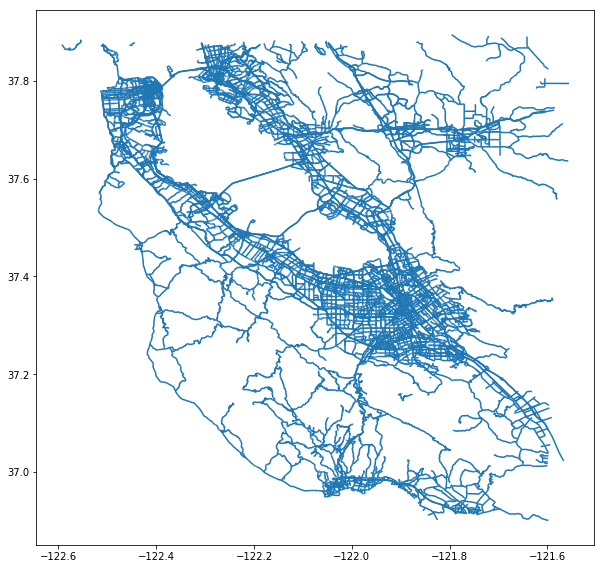

In [5]:
%matplotlib inline
roads_df.plot(figsize=(10,10))

In [6]:
roads_df.tail()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
54680,552616039,5115,tertiary,Alder Drive,None,F,64,0.0,F,F,"LINESTRING (-121.9158012 37.4131651, -121.9158..."
54681,552616040,5115,tertiary,Alder Drive,None,F,64,0.0,F,F,"LINESTRING (-121.9161089 37.4132495, -121.9159..."
54682,552616041,5115,tertiary,Alder Drive,None,F,64,0.0,F,F,"LINESTRING (-121.9137148 37.4136598, -121.9135..."
54683,552616042,5115,tertiary,Alder Drive,None,B,64,0.0,F,F,"LINESTRING (-121.9137148 37.4136598, -121.9142..."
54684,552616043,5115,tertiary,Alder Drive,None,F,64,0.0,F,F,"LINESTRING (-121.9132784 37.4139034, -121.9136..."


In [7]:
roads_df.isnull().sum(axis=0)

osm_id          0
code            0
fclass          0
name         8975
ref         47125
oneway          0
maxspeed        0
layer           0
bridge          0
tunnel          0
geometry        0
dtype: int64

In [8]:
len(roads_df[roads_df["maxspeed"] == 0])

34952

In [9]:
frow = roads_df.iloc[1000]
print(f"{frow}\n\nCoords : {frow['geometry'].xy}\n\nLength {frow['geometry'].length}")

osm_id                                                6402644
code                                                     5115
fclass                                               tertiary
name                                        Almaden Boulevard
ref                                                      None
oneway                                                      B
maxspeed                                                   40
layer                                                       0
bridge                                                      F
tunnel                                                      F
geometry    LINESTRING (-122.0593666 37.6038845, -122.0581...
Name: 1000, dtype: object

Coords : (array('d', [-122.0593666, -122.0581518, -122.0572934, -122.0571144, -122.0569186, -122.0567657, -122.0566584, -122.0566088, -122.0567335, -122.056928, -122.057396, -122.0574698, -122.0574577, -122.0573591, -122.0572354, -122.0566423, -122.0561337, -122.0555037, -122.0553468, -122.

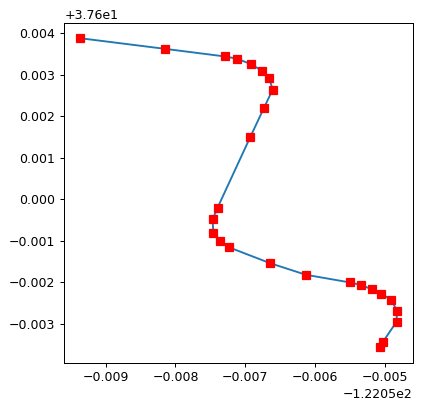

In [83]:
x, y = frow['geometry'].xy
fig = plt.figure(1, figsize=(5,5), dpi=90)
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.plot(x, y, 'rs')

In [11]:
def split_data_frame_list(df, 
                       target_column,
                       col_name,
                      output_type=list):
    ''' 
    Accepts a column with multiple types and splits list variables to several rows.

    df: dataframe to split
    target_column: the column containing the values to split
    output_type: type of all outputs
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    row_accumulator = []
    cols = list(df.columns)
    cols.remove(target_column)


    def split_list_to_rows(row):
        split_row = row[target_column]
        if isinstance(split_row, list):
            for s in split_row:
                new_row = row.to_dict()
                new_row[col_name] = output_type(s)
                row_accumulator.append(new_row)
        else:
            new_row = row.to_dict()
            new_row[col_name] = output_type(split_row)
            row_accumulator.append(new_row)
  
    df.apply(split_list_to_rows, axis=1)
    new_df = pd.DataFrame.from_records(row_accumulator, columns=cols)
  
    return new_df

In [12]:
roads_df["geometry_arr"] = roads_df["geometry"].apply(lambda geom : list(zip(*geom.xy)))

roads_df["edge_list"] =  roads_df["geometry_arr"].apply(lambda coords : [[coords[i], coords[i+1]] for i in range(len(coords) - 1)])

edge_df = split_data_frame_list(roads_df, "edge_list", "geometry")
edge_df["source"] = edge_df["geometry"].apply(lambda edge: edge[0])
edge_df["target"] = edge_df["geometry"].apply(lambda edge: edge[1])
edge_df = edge_df.drop(['geometry','geometry_arr'],  axis = 1)
roads_df = roads_df.drop(["geometry_arr", "edge_list"], axis = 1)


In [13]:

edge_df.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,source,target
0,4304424,5134,secondary_link,None,None,F,0,1.0,T,F,"(-122.0470346, 37.3867598)","(-122.0469872, 37.3867158)"
1,4304424,5134,secondary_link,None,None,F,0,1.0,T,F,"(-122.0469872, 37.3867158)","(-122.04691, 37.3866479)"
2,4304424,5134,secondary_link,None,None,F,0,1.0,T,F,"(-122.04691, 37.3866479)","(-122.046828, 37.3865875)"
3,4304424,5134,secondary_link,None,None,F,0,1.0,T,F,"(-122.046828, 37.3865875)","(-122.0467464, 37.3865318)"
4,4304424,5134,secondary_link,None,None,F,0,1.0,T,F,"(-122.0467464, 37.3865318)","(-122.0466566, 37.3864817)"


In [14]:
from math import radians, cos, sin, asin, sqrt, atan2

def haversine(loc1, loc2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1, lat1 = loc1
    lon2, lat2 = loc2
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378100 # Radius of earth in meters. Use 3956 for miles
    return c * r
  

In [15]:
edge_df["dist"] = edge_df.apply(lambda row: haversine(row["source"], row["target"]), axis = 1)

In [16]:
edge_df.tail()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,source,target,dist
269145,552616041,5115,tertiary,Alder Drive,None,F,64,0.0,F,F,"(-121.9137148, 37.4136598)","(-121.9135706, 37.4136576)",12.752112
269146,552616041,5115,tertiary,Alder Drive,None,F,64,0.0,F,F,"(-121.9135706, 37.4136576)","(-121.9132082, 37.4137866)",35.113054
269147,552616042,5115,tertiary,Alder Drive,None,B,64,0.0,F,F,"(-121.9137148, 37.4136598)","(-121.9142689, 37.4134486)",54.341193
269148,552616043,5115,tertiary,Alder Drive,None,F,64,0.0,F,F,"(-121.9132784, 37.4139034)","(-121.913643, 37.4137684)",35.567620
269149,552616043,5115,tertiary,Alder Drive,None,F,64,0.0,F,F,"(-121.913643, 37.4137684)","(-121.9137148, 37.4136598)",13.654704


In [17]:
speed_limits_in_mph = {
  "living_street" :  10,
  "motorway" :  65, 
  "motorway_link" : 40, 
  "primary" : 55,
  "primary_link" : 30,
  "residential" : 25, 
  "secondary" : 35,
  "secondary_link" : 25,
  "service" : 15, 
  "tertiary" : 35,
  "tertiary_link" :25,
  "trunk" : 55, 
  "trunk_link" : 30,
  "unclassified" : 55,  
  "unknown" : 40
}

In [18]:
edge_df["maxspeed"] = edge_df.apply(lambda row: speed_limits_in_mph[row["fclass"]] * 1.609 if row["maxspeed"] == 0 else row["maxspeed"], axis = 1)

In [19]:
pd.options.mode.chained_assignment = None
nt = edge_df.query("oneway != 'T'", inplace = False)
b = edge_df.query("oneway == 'B'", inplace = False)

src_tmp = b["source"]
b["source"] = b["target"]
b["target"] = src_tmp

t = edge_df.query("oneway == 'T'" , inplace = False)
src_tmp = t["source"]
t["source"] = t["target"]
t["target"]  = src_tmp



In [20]:

edge_df = pd.concat([nt, b, t], ignore_index=True)
edge_df.tail()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,source,target,dist
386708,397809208,5115,tertiary,Shell Parkway,None,T,48.000,0.0,F,F,"(-122.2421439, 37.5333335)","(-122.2421439, 37.5333335)",12.434469
386709,415826593,5114,secondary,Fruitdale Avenue,None,T,56.315,0.0,F,F,"(-121.9190164, 37.3106507)","(-121.9190164, 37.3106507)",48.007237
386710,415826593,5114,secondary,Fruitdale Avenue,None,T,56.315,0.0,F,F,"(-121.9191539, 37.310704)","(-121.9191539, 37.310704)",13.542958
386711,417320442,5115,tertiary,Shell Parkway,None,T,48.000,0.0,F,F,"(-122.2437675, 37.5349605)","(-122.2437675, 37.5349605)",12.457199
386712,417320453,5115,tertiary,Shell Parkway,None,T,48.000,0.0,F,F,"(-122.2438693, 37.535038)","(-122.2438693, 37.535038)",22.787404


In [21]:
edge_df["time"] = (edge_df["dist"]/edge_df["maxspeed"]) * (18/5)

In [22]:
edge_df.tail()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,source,target,dist,time
386708,397809208,5115,tertiary,Shell Parkway,None,T,48.000,0.0,F,F,"(-122.2421439, 37.5333335)","(-122.2421439, 37.5333335)",12.434469,0.932585
386709,415826593,5114,secondary,Fruitdale Avenue,None,T,56.315,0.0,F,F,"(-121.9190164, 37.3106507)","(-121.9190164, 37.3106507)",48.007237,3.068917
386710,415826593,5114,secondary,Fruitdale Avenue,None,T,56.315,0.0,F,F,"(-121.9191539, 37.310704)","(-121.9191539, 37.310704)",13.542958,0.865749
386711,417320442,5115,tertiary,Shell Parkway,None,T,48.000,0.0,F,F,"(-122.2437675, 37.5349605)","(-122.2437675, 37.5349605)",12.457199,0.934290
386712,417320453,5115,tertiary,Shell Parkway,None,T,48.000,0.0,F,F,"(-122.2438693, 37.535038)","(-122.2438693, 37.535038)",22.787404,1.709055


In [26]:
G = nx.from_pandas_edgelist (df = edge_df, edge_attr = ["osm_id", "name", "time"], create_using  = nx.DiGraph())

In [27]:
nodelist = list(G.nodes())

In [28]:
import random
random.seed(1000)

In [29]:
src, target = nodelist[random.randint(0, len(nodelist)-1)], nodelist[random.randint(0, len(nodelist)-1)]
src, target

((-122.4556556, 37.7813601), (-122.1097757, 37.4554529))

In [70]:
!pip install mplleaflet

  Running setup.py bdist_wheel for mplleaflet ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [71]:
import numpy as np
import mplleaflet


(-122.64490873, -121.50355027, 36.851077595, 37.944222505)

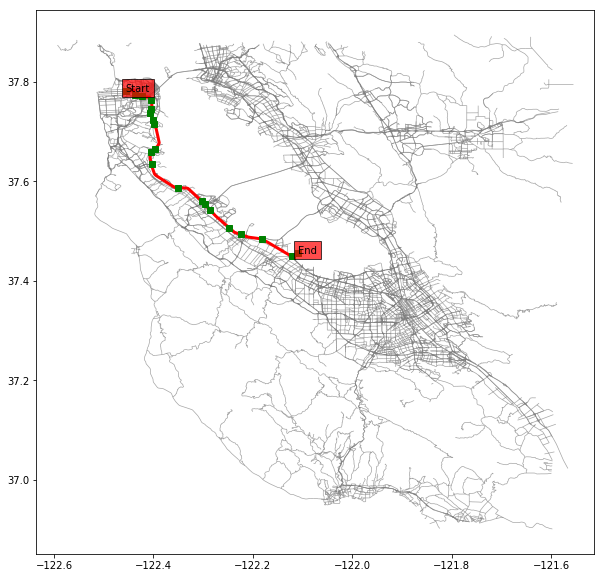

In [82]:

sp = nx.dijkstra_path(G, src, target, weight='time')

f, ax = plt.subplots(1, figsize=(10,10))
roads_df.plot(color='gray', ax=ax, linewidth = 0.7, alpha = 0.7)

idx = np.random.choice(len(sp), min(20, len(sp)))
sp = np.array(sp)
ax.plot(sp[:,0], sp[:,1], color = "red", linewidth=3)
ax.plot(sp[0][0], sp[0][1], 'gs')
ax.plot(sp[-1][0], sp[-1][1], 'gs')

ax.plot(sp[idx][:,0], sp[idx][:,1], 'gs')

ax.text(sp[0][0], sp[0][1], 'Start',bbox=dict(facecolor='red', alpha= 0.7), color='k')
ax.text(sp[-1][0], sp[-1][1], 'End', bbox=dict(facecolor='red', alpha = 0.7), color='k')
                       

plt.axis('equal')
#mplleaflet.show(fig = ax.figure, crs =  )

In [79]:
nx.dijkstra_path_length(G, src, target, weight='time')//60

37.0

In [84]:
spl = nx.single_source_dijkstra_path_length(G, src, cutoff = 1800, weight="time")
dict([spl.popitem() for i in range(0, 10)])

{(-122.2456435, 37.5305405): 1799.9782349654108,
 (-122.2333449, 37.4847434): 1799.9690732257714,
 (-122.1441438, 37.7010257): 1799.9647049823175,
 (-122.2110971, 37.4894826): 1799.9540160268907,
 (-122.2081842, 37.7154761): 1799.9496466894868,
 (-122.1098211, 37.7129019): 1799.9418527950454,
 (-122.2139752, 37.487939): 1799.9315843988768,
 (-122.2258331, 37.4828892): 1799.90198642376,
 (-122.2678398, 37.4956928): 1799.8897621095728,
 (-122.2590305, 37.5358869): 1799.8825855769614}

In [85]:
from scipy.spatial import Delaunay
from shapely.ops import cascaded_union, polygonize
from shapely.geometry import MultiPoint, Polygon, MultiLineString, MultiPolygon, Point
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KDTree
import time

In [86]:
def generate_alpha_poly(coords, alpha):
    start = time.time()
    if len(coords) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(coords).convex_hull
    edges = set()
    edge_points = []
    def add_edge(i, j):
      """
      if (i, j) in edges or (j, i) in edges:
        return
      edges.add( (i, j) )
      """
      edge_points.append(coords[ [i, j] ])
      
    # Compute Delauney traingles
    tri = Delaunay(coords)
    
    # loop over triangles:
    # ia, ib, ic = indices of the points forming the simplices in the triangulation. 
   
    for ia, ib, ic in tri.simplices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        # Lengths of sides of triangle
        # Lengths of sides of triangle
        try:
            a = sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
            b = sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
            c = sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
            # Semiperimeter of triangle
            s = (a + b + c)/2.0
            # Area of triangle by Heron's formula
            area = sqrt(s*(s-a)*(s-b)*(s-c))
            circum_r = a*b*c/(4.0*area)
          # Here's the radius filter.
            if circum_r < 1.0/alpha:
                add_edge(ia, ib)
                add_edge(ib, ic)
                add_edge(ic, ia)
        except ValueError: 
            #print("Value Error encountered\ns : {}, a : {}, b : {}, c: {}".format(s, a, b, c))
            continue
        except ZeroDivisionError: 
            #print("Zero Division error encountered")
            continue
    b = np.array(edge_points)
    u, counts = np.unique(b, axis = 0, return_counts =True)
    u = u[counts == 1]

    m = MultiLineString(list(u))
    triangles = list(polygonize(m))
    alpha_poly = cascaded_union(triangles)
    return alpha_poly

In [87]:
pts = np.array(list(spl.keys()))
pts = np.round(pts, 3)
pts = np.unique(pts,axis = 0)
poly = generate_alpha_poly(pts, 150)

In [89]:
!pip install descartes
import descartes

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [91]:
src[0]

-122.4556556

(-122.6, -121.8, 37.2, 38.0)

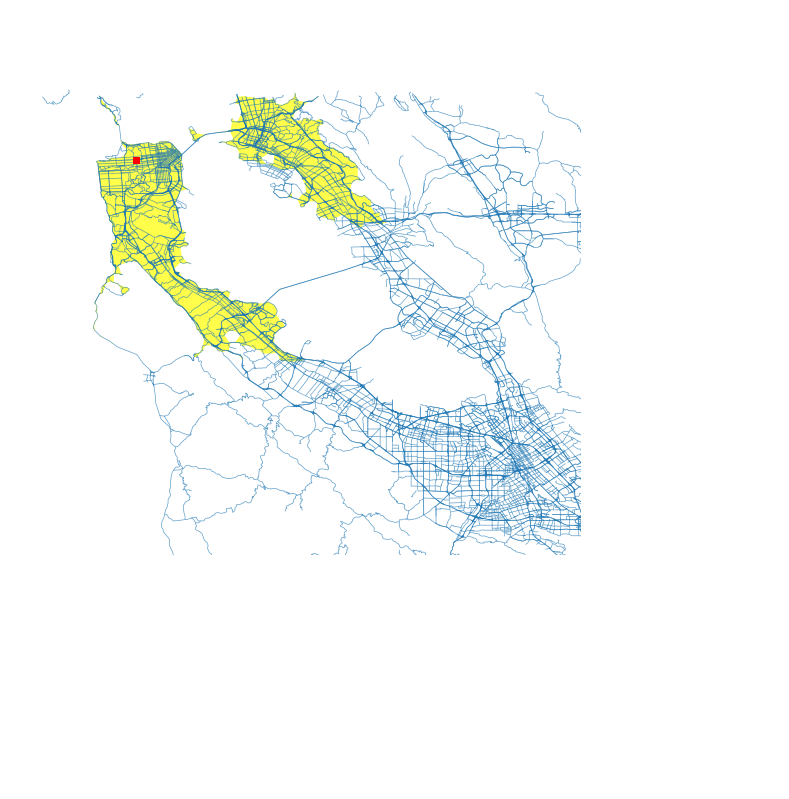

In [93]:
spd = gpd.GeoDataFrame(geometry = [poly])
g, ax = plt.subplots(1, figsize=(10,10))
ax = roads_df.plot(ax=ax, linewidth = 0.7, alpha = 0.7)
spd.plot(ax=ax, color='yellow', alpha = 0.7)
ax.plot(src[0], src[1], 'rs')
ax.set_ylim(37.2, 38)
ax.set_xlim(-122.6, -121.8)
plt.axis('off')

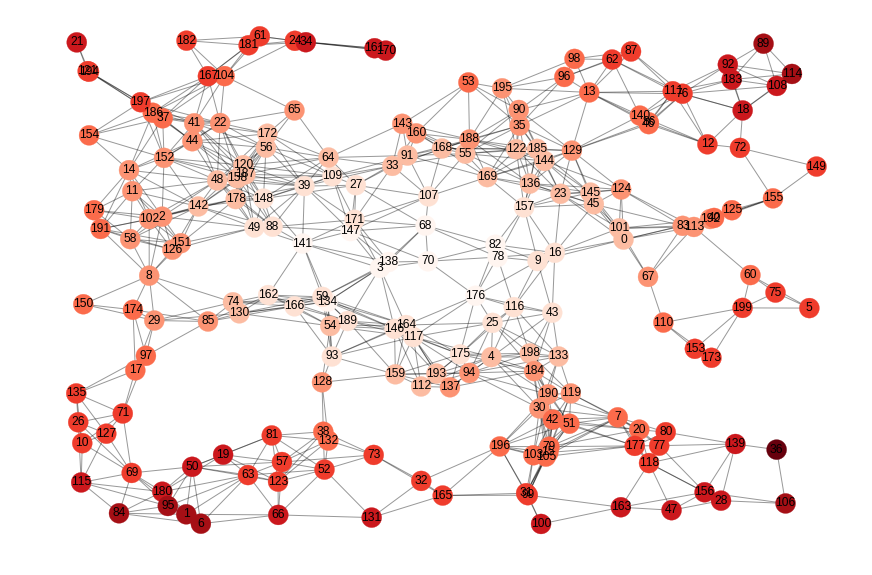

In [24]:
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()), \
                       node_size=400, \
                       node_color= list(reversed(list(p.values()))),\
                       cmap=plt.cm.Reds_r)
nx.draw_networkx_labels(G,pos,font_size=12)


plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

In [62]:
test_roads = gpd.read_file('Cal_Roads/Cal_roads_simple.shp')
sp_edges_df = pd.read_csv('POIS/output.csv')
sp_edges_df = sp_edges_df[np.isfinite(sp_edges_df['src_node_lat'])]

sp_edges_df

,src_node_id,dest_node_id,src_node_lat,src_node_lon,dest_node_lat,dest_node_lon,drive_time_in_s,walk_time_in_s
0,9muc09f,9muc0dd,32.53015,-117.04479,32.53334,-117.04518,32.0,257.0
1,9muc0dd,9muc0df,32.53334,-117.04518,32.53467,-117.04534,31.0,125.0
2,9muc0df,9muc0e9,32.53467,-117.04534,32.53991,-117.04597,70.0,440.0
3,9muc0e9,9muc0ee,32.53991,-117.04597,32.54007,-117.04411,16.0,126.0
4,9muc0ee,9muc0dg,32.54007,-117.04411,32.53485,-117.04348,52.0,421.0


In [63]:
pts = sp_edges_df[["src_node_lon", "src_node_lat"]].as_matrix()
pts = np.concatenate((pts,  sp_edges_df[["dest_node_lon", "dest_node_lat"]].as_matrix()[-1:,]), axis = 0)

In [64]:
#This part takes some time. So need not do this everytime.. But this is a bit generic solution

b = LineString(pts.tolist()).buffer(0.03)
xmin, ymin, xmax, ymax = b.bounds
clipped_df = test_roads.cx[xmin:xmax, ymin:ymax]

(-117.092065975, -117.00323272499999, 32.527196055, 32.592182845)

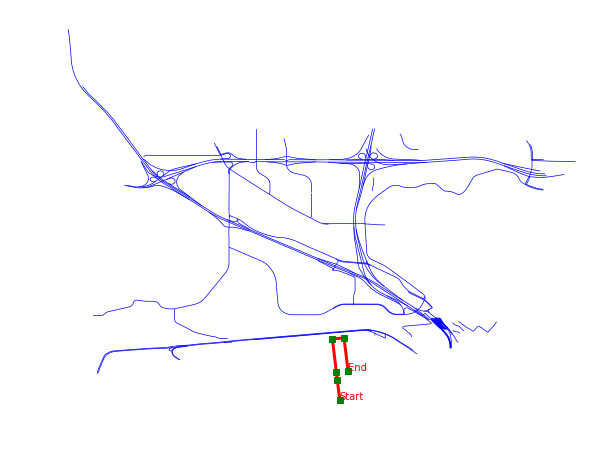

In [77]:
#plotting

f, ax = plt.subplots(1, figsize=(10,10))

ax = clipped_df.plot(color='blue', ax=ax, linewidth = 0.7)
ax.plot(pts[:,0], pts[:,1], color = "red", linewidth=3)
ax.plot(pts[:,0], pts[:,1], 'gs')

plt.text(pts[0][0], pts[0][1], 'Start', color='r')
plt.text(pts[-1][0], pts[-1][1], 'End', color='r')
plt.axis('off')

In [74]:
test_roads.crs

{}